# **Deploy Book Recommendation System using Flask**
  ### Based on Collaborative Filtering

In [45]:
#Mount Google-Drive

In [46]:

#To access files from google drive to colab shell we have to first mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
#import libraries
import pandas as pd             #used to analyze the data.
import numpy as np              #used for working with arrays. 

##Reading the Data

In [48]:
#read dataset from google drive
book_rating=pd.read_csv("/content/drive/My Drive/MiniProject_6sem/Book Recommender/Book-Ratings.csv",sep=';', error_bad_lines=False, encoding="latin-1")

book=pd.read_csv("/content/drive/My Drive/MiniProject_6sem/Book Recommender/Books.csv",sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:27

In [49]:
#Show the book-info
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [50]:
#show the book_rating-info
book_rating.head()

,User-ID,ISBN,Book-Rating
0,276725.0,034545104X,0.0
1,276726.0,0155061224,5.0
2,276727.0,0446520802,0.0
3,276729.0,052165615X,3.0
4,276729.0,0521795028,6.0


In [51]:
#shows the row and coloumn inside book-info 
book.shape

(271360, 8)

In [52]:
#shows the row and column inside book_rating-info
book_rating.shape

(1149780, 3)

In [53]:
book_details=book[["ISBN","Book-Title","Book-Author","Year-Of-Publication"]]
book_details.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999


##Merging two dataset into one

In [54]:
#Merge both dataset book_details and book_rating into merge_data
merge_data=book_rating.merge(book_details,on="ISBN",how='inner')
merge_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication
0,276725.0,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002
1,2313.0,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002
2,6543.0,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002
3,8680.0,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002
4,10314.0,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose,2002


##Data Visualization and Preprocessing

In [55]:
import matplotlib.pyplot as plt


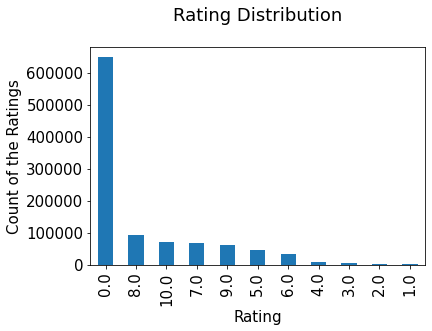

In [56]:
# Rating Count
plt.rc("font", size=15)
merge_data["Book-Rating"].value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count of the Ratings')
plt.show()

In [57]:
merge_data.shape

(1031136, 6)

In [58]:
#Counting the number of rating in each book
rating_total_count = pd.DataFrame(merge_data.groupby('ISBN')['Book-Rating'].count())
rating_total_count.sort_values('Book-Rating', ascending=False).head(10)

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
044023722X,647
0142001740,615
067976402X,614
0671027360,586


In [59]:
#Counting the number of rating given by each user
user_total_count = pd.DataFrame(merge_data.groupby('User-ID')['Book-Rating'].count())
user_total_count.sort_values('Book-Rating', ascending=False).head(10)

,Book-Rating
User-ID,
11676.0,11144
198711.0,6456
153662.0,5814
98391.0,5779
35859.0,5646
212898.0,4289
278418.0,3996
76352.0,3329
110973.0,2971


###We need to make sure that the book has enough reviews from users and the users has also given enough reviews.

In [60]:
#Getting users who had given more than 100 ratings
user_count = merge_data['User-ID'].value_counts()
merge_data = merge_data[merge_data['User-ID'].isin(user_count[user_count >= 100].index)]

#Getting books which have more than 100 ratings by the users
book_count = merge_data['Book-Rating'].value_counts()
merge_data = merge_data[merge_data['Book-Rating'].isin(book_count[book_count >= 100].index)]

In [61]:
merge_data.shape

(592996, 6)

In [62]:
data=merge_data[['User-ID','ISBN','Book-Rating','Book-Title']]
data.rename(columns = {'User-ID':'userid','Book-Rating':'bookrating','Book-Title':'booktitle'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
data.reset_index()

,index,userid,ISBN,bookrating,booktitle
0,2,6543.0,034545104X,0.0,Flesh Tones: A Novel
1,4,10314.0,034545104X,9.0,Flesh Tones: A Novel
2,5,23768.0,034545104X,0.0,Flesh Tones: A Novel
3,7,28523.0,034545104X,0.0,Flesh Tones: A Novel
4,14,77480.0,034545104X,8.0,Flesh Tones: A Novel
...,...,...,...,...,...
592991,1031115,276680.0,0812881311,0.0,Streets of Gold
592992,1031116,276680.0,0865055041,0.0,Kitchen (Historic Communities (Paperback))
592993,1031117,276680.0,086505505X,0.0,Home Crafts (Historic Communities (Paperback))
592994,1031118,276680.0,1564407284,0.0,"The Old Sturbridge Village Cookbook, 2nd : Aut..."


##Collaborative Filtering using k Nearest Neighbour

In [64]:
data1 = data.merge(rating_total_count, left_on = 'ISBN', right_on = 'ISBN', how = 'left')
data1.rename(columns = {'Book-Rating':'totalratings'}, inplace = True)
data1.head()

,userid,ISBN,bookrating,booktitle,totalratings
0,6543.0,034545104X,0.0,Flesh Tones: A Novel,60
1,10314.0,034545104X,9.0,Flesh Tones: A Novel,60
2,23768.0,034545104X,0.0,Flesh Tones: A Novel,60
3,28523.0,034545104X,0.0,Flesh Tones: A Novel,60
4,77480.0,034545104X,8.0,Flesh Tones: A Novel,60


In [65]:
data1.shape

(592996, 5)

In [66]:
threshold = 50
data1 = data1.query('totalratings >= @threshold')
data1.head()

,userid,ISBN,bookrating,booktitle,totalratings
0,6543.0,034545104X,0.0,Flesh Tones: A Novel,60
1,10314.0,034545104X,9.0,Flesh Tones: A Novel,60
2,23768.0,034545104X,0.0,Flesh Tones: A Novel,60
3,28523.0,034545104X,0.0,Flesh Tones: A Novel,60
4,77480.0,034545104X,8.0,Flesh Tones: A Novel,60


In [67]:
data1.shape

(116864, 5)

In [79]:
#cosine similarity
from scipy.sparse import csr_matrix
data1 = data1.drop_duplicates(['userid', 'booktitle'])
#pivot ratings into book features
data_pivot = data1.pivot(index = 'booktitle', columns = 'userid', values = 'bookrating').fillna(0)

#convert dataframe of movie features to scipy sparse matrix
data1_mat = csr_matrix(data_pivot.values)

data_pivot

userid,254.0,507.0,882.0,1424.0,1435.0,1733.0,1903.0,2033.0,2110.0,2276.0,2358.0,2766.0,2891.0,2977.0,3363.0,3371.0,3757.0,3827.0,4017.0,4157.0,4385.0,5582.0,5903.0,6242.0,6251.0,6323.0,6543.0,6563.0,6575.0,7125.0,7158.0,7286.0,7346.0,7915.0,8066.0,8067.0,8245.0,8253.0,8284.0,8362.0,...,269566.0,269719.0,269728.0,269890.0,270713.0,270820.0,270838.0,271195.0,271245.0,271284.0,271448.0,271538.0,271622.0,271705.0,272225.0,272482.0,272715.0,273086.0,273110.0,273113.0,273190.0,273718.0,273979.0,274004.0,274061.0,274111.0,274301.0,274308.0,274549.0,274808.0,275020.0,275970.0,276463.0,276680.0,277427.0,277478.0,277639.0,278137.0,278188.0,278418.0
booktitle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_pivot.head(5)

In [70]:
# kNN Model
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(data1_mat)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [71]:
#saving model
import pickle
pickle.dump(model,open('/content/drive/MyDrive/MiniProject_6sem/Book Recommender/model_train.pkl','wb'))

##Deployement Using Flask Application

In [72]:
!pip install flask-ngrok

In [80]:
#flask Application
from flask import Flask, request,  render_template
from flask_ngrok import run_with_ngrok

In [81]:
books_list=list(data_pivot.index)

In [82]:
books_list

['16 Lighthouse Road',
 '1984',
 '1st to Die: A Novel',
 '2010: Odyssey Two',
 '204 Rosewood Lane',
 '24 Hours',
 '2nd Chance',
 '3rd Degree',
 '4 Blondes',
 '50 Simple Things You Can Do to Save the Earth',
 '84 Charing Cross Road',
 'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
 'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
 'A Bend in the Road',
 'A Case of Need',
 'A Child Called \\It\\": One Child\'s Courage to Survive"',
 'A Civil Action',
 'A Clockwork Orange (Norton Paperback Fiction)',
 'A Cold Heart (Alex Delaware Novels (Paperback))',
 'A Cold Heart: An Alex Delaware Novel',
 'A Confederacy of Dunces',
 'A Confederacy of Dunces (Evergreen Book)',
 'A Cry In The Night',
 "A Cup of Tea (Ballantine Reader's Circle)",
 'A Dangerous Fortune',
 'A Darkness More Than Night',
 'A Day Late and a Dollar Short',
 'A Fine Balance',
 'A Game of Thrones (A Song of Ice and Fire, Book 1)',
 'A Girl Named Zippy: Gr

In [83]:
with open("/content/drive/MyDrive/MiniProject_6sem/Book Recommender/book_list.txt", "wb") as fp:
   pickle.dump(books_list, fp)

In [84]:
#Function to get the Index of the Book
def get_index(req):
  count=0
  for i in books_list:
    count+=1
    alpha=i.lower()
    
    if alpha==req:
      return (count-1)
    else:
      continue

In [85]:
app = Flask(__name__,template_folder='/content/drive/MyDrive/MiniProject_6sem/Book Recommender/template')
model = pickle.load(open('/content/drive/MyDrive/MiniProject_6sem/Book Recommender/model_train.pkl', 'rb'))
run_with_ngrok(app)

@app.route('/')
def home():
    return render_template('book_index.html')

@app.route('/predict',methods=['POST'])
def predict():
  if request.method == 'POST':
    message = str(request.form['message'])
    inp=str(message)
    ind=get_index(message)
    if bool(ind)== True:
      distances, indices = model.kneighbors(data_pivot.iloc[ind,:].values.reshape(1, -1), n_neighbors = 6)
      Listofbooks=[]
      for i in range(0, len(distances.flatten())):
        Listofbooks.append(data_pivot.index[indices.flatten()[i]])
      return render_template('book_index.html',prediction_text = 'Recommended Books for: {}'.format(Listofbooks[0]),
                             prediction_text1 = '1]  {}'.format(Listofbooks[1]),
                             prediction_text2 = '2]  {}'.format(Listofbooks[2]),
                             prediction_text3 = '3]  {}'.format(Listofbooks[3]),
                             prediction_text4 = '4]  {}'.format(Listofbooks[4]),
                             prediction_text5 = '5]  {}'.format(Listofbooks[5]))
    elif bool(ind)== False:
      return render_template('book_index.html',prediction_text = 'Sorry!! We Do not have that book in our Dataset')



In [ ]:
if __name__ == "__main__":
  app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://a84e07b84cef.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [15/May/2021 06:32:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2021 06:32:51] "GET /bg.jpg HTTP/1.1" 404 -
127.0.0.1 - - [15/May/2021 06:32:52] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [15/May/2021 06:32:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2021 06:32:54] "GET /bg.jpg HTTP/1.1" 404 -
127.0.0.1 - - [15/May/2021 06:34:26] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2021 06:34:26] "GET /bg.jpg HTTP/1.1" 404 -
127.0.0.1 - - [15/May/2021 06:34:28] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [15/May/2021 06:34:41] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2021 06:34:42] "GET /bg.jpg HTTP/1.1" 404 -
